In [1]:
#Created on October 29, 2017
import os
import re
import collections as col
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pool_results_for_a_gene
reload(pool_results_for_a_gene)
from pool_results_for_a_gene import Pool_logs_for_a_gene

font = {'family' : 'normal', 'weight' : 'normal', 'size'   : 40} # weight can be "bold" or "normal"
plt.rc('font', **font)
plt.rcParams['pdf.fonttype'] = 42

inputDir_base = "/Users/Dinesh/Dropbox/Github/predicting_gex_with_nn_v2/Output/"
performance_metric = "test_cbyr" # "train_and_test_cbyr"

## Plot performance by C/T-sample and condition

In [2]:
def get_df_perf_for_pooled_logs(gene, rank_lower_lim, rank_upper_lim, use_nonRanked, inputDir):
    pooled = Pool_logs_for_a_gene(gene, rank_lower_lim, rank_upper_lim, use_nonRanked, inputDir)

    pooled_perf = {}
    pooled_perf["mode"] = []
    pooled_perf["gene_wCond"] = []
    pooled_perf["perf"] = []

    for alog in pooled.logs:
        for amode in ["dhss", "tfs", "dhss_tfs"]:
            pooled_perf["mode"].append(amode)
            pooled_perf["gene_wCond"].append(alog.gene_wCond)
            pooled_perf["perf"].append(alog.get_best_perf(mode=amode, by=performance_metric))

    df_pooled_perf = pd.DataFrame(pooled_perf, columns=pooled_perf.keys())
    return df_pooled_perf

In [3]:
df_pooled_perf_ski = get_df_perf_for_pooled_logs("SKI", 1, 1100, True, inputDir=os.path.join(inputDir_base, "ski"))
df_pooled_perf_cdk4 = get_df_perf_for_pooled_logs("CDK4", 1, 1100, True, inputDir=os.path.join(inputDir_base, "cdk4"))
df_pooled_perf_prdm2 = get_df_perf_for_pooled_logs("PRDM2", 1, 1100, True, inputDir=os.path.join(inputDir_base, "prdm2"))
df_pooled_perf_des = get_df_perf_for_pooled_logs("DES", 1, 1100, True, inputDir=os.path.join(inputDir_base, "des"))
df_pooled_perf_gata2 = get_df_perf_for_pooled_logs("GATA2", 1, 1100, True, inputDir=os.path.join(inputDir_base, "gata2"))

('SKI_150kb_T1.0_t0.3_cWts_m800_rDHSs_run605_s', 'is tainted')
('SKI_150kb_T1.0_t0.3_cWts_m800_rDHSs_run659_s', 'is tainted')
('SKI_150kb_T1.0_t0.3_cWts_m800_rDHSs_run703_s', 'is tainted')
('SKI_150kb_T1.0_t0.3_cWts_m800_rDHSs_run705_s', 'is tainted')
('SKI_150kb_T1.0_t0.3_cWts_m800_rDHSs_run732_s', 'is tainted')
('SKI_150kb_T1.0_t0.3_cWts_m800_rTFs_rDHSs_run1008', 'is tainted')
('SKI_150kb_T1.0_t0.3_cWts_m800_rTFs_rDHSs_run1011', 'is tainted')
('SKI_150kb_T1.0_t0.3_cWts_m800_rTFs_rDHSs_run850_s', 'is tainted')
('SKI_150kb_T1.0_t0.3_cWts_m800_rTFs_rDHSs_run862_s', 'is tainted')
('SKI_150kb_T1.0_t0.3_cWts_m800_rTFs_rDHSs_run872_s', 'is tainted')
('SKI_150kb_T1.0_t0.3_cWts_m800_rTFs_rDHSs_run905_s', 'is tainted')
('SKI_150kb_T1.0_t0.3_cWts_m800_rTFs_rDHSs_run909_s', 'is tainted')
('SKI_150kb_T1.0_t0.3_cWts_m800_rTFs_rDHSs_run949_s', 'is tainted')
('SKI_150kb_T1.0_t0.3_cWts_m800_rTFs_rDHSs_run951_s', 'is tainted')
('SKI_150kb_T1.0_t0.3_cWts_m800_rTFs_run442_s', 'is tainted')
('SKI_150kb_T

('GATA2_150kb_T1.0_t0.3_cWts_m800_rTFs_rDHSs_run909_s', 'is tainted')
('GATA2_150kb_T1.0_t0.3_cWts_m800_rTFs_rDHSs_run934_s', 'is tainted')
('GATA2_150kb_T1.0_t0.3_cWts_m800_rTFs_rDHSs_run960_s', 'is tainted')
('GATA2_150kb_T1.0_t0.3_cWts_m800_rTFs_rDHSs_run973_s', 'is tainted')


In [4]:
def plot_pooled_perfs_for_genes(df_pooled_perfs_list, tidied):
    sns.set(font_scale=1.5)
    if (tidied):
        plt.figure(0, (10.5, 13.5))
    else:
        plt.figure(0, (10.5, 18))
    plt.suptitle(performance_metric)
    for i, adf in enumerate(df_pooled_perfs_list):
        plt.subplot(5,1,i+1)
        sns.boxplot(y="gene_wCond_renamed", x="perf", hue="mode", data=adf, 
                    palette="Set2", orient="h", fliersize=1, saturation=0.8, linewidth=1, width=0.6)
        #sns.boxplot(y="mode", x="perf", hue="gene_wCond", data=adf, palette="Set2", orient="h", fliersize=3)
        plt.legend(loc=0, fontsize=10)    
        plt.xlabel("Performance")
        plt.ylabel(re.split("_", adf["gene_wCond"].tolist()[0])[0])
    #    plt.xlim(0,0.5)
    plt.tight_layout()
    plt.savefig("{}_across_test_genes{}.pdf".format(performance_metric, 
                                                   "_tidied" if tidied else ""))

In [5]:
# df_pooled_perfs_list = [df_pooled_perf_ski, df_pooled_perf_cdk4, df_pooled_perf_prdm2, df_pooled_perf_des, df_pooled_perf_gata2]
# plot_pooled_perfs_for_genes(df_pooled_perfs_list)

In [6]:
def get_tidied_df_pooled_perf(gene, df_pooled_perf):
    cond1 = "{}_150kb_T1.0_t0.3_cWts_m800_rTFs_rDHSs_s".format(gene)
    df_cond1 = df_pooled_perf[df_pooled_perf["gene_wCond"].isin([cond1])]
    df_cond1["gene_wCond_renamed"] = "Random TFs and DHS sites (Train-test fixed)"

    cond2 = "{}_150kb_T1.0_t0.3_cWts_m800_s".format(gene)
    df_cond2 = df_pooled_perf[df_pooled_perf["gene_wCond"].isin([cond2])]
    df_cond2["gene_wCond_renamed"] = "Original TFs and DHS sites (Train-test fixed)"

    cond3 = "{}_150kb_T1.0_t0.3_cWts_m800_rTFs_rDHSs".format(gene)
    df_cond3 = df_pooled_perf[df_pooled_perf["gene_wCond"].isin([cond3])]
    df_cond3["gene_wCond_renamed"] = "Random TFs and DHS sites (Random Train-test splits)"

    cond4 = "{}_150kb_T1.0_t0.3_rWts_m800".format(gene)
    df_cond4 = df_pooled_perf[df_pooled_perf["gene_wCond"].isin([cond4])]
    df_cond4["gene_wCond_renamed"] = "Original TFs and DHS sites (Random Train-test splits)"

    df = pd.concat([df_cond1, df_cond2, df_cond3, df_cond4])
    return df

In [7]:
df_pooled_perf_ski_tidied = get_tidied_df_pooled_perf("SKI", df_pooled_perf_ski)
df_pooled_perf_cdk4_tidied = get_tidied_df_pooled_perf("CDK4", df_pooled_perf_cdk4)
df_pooled_perf_prdm2_tidied = get_tidied_df_pooled_perf("PRDM2", df_pooled_perf_prdm2)
df_pooled_perf_des_tidied = get_tidied_df_pooled_perf("DES", df_pooled_perf_des)
df_pooled_perf_gata2_tidied = get_tidied_df_pooled_perf("GATA2", df_pooled_perf_gata2)

df_pooled_perfs_list = [df_pooled_perf_ski_tidied, 
                        df_pooled_perf_cdk4_tidied, 
                        df_pooled_perf_prdm2_tidied, 
                        df_pooled_perf_des_tidied, 
                        df_pooled_perf_gata2_tidied]


/Users/Dinesh/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/Dinesh/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/Dinesh/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

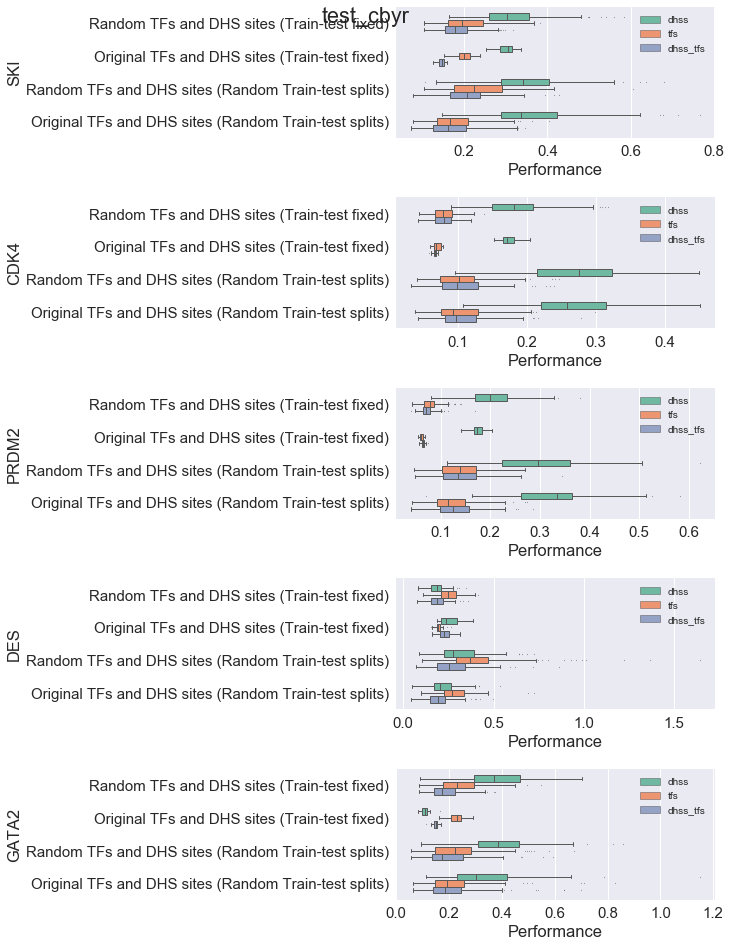

In [8]:
plot_pooled_perfs_for_genes(df_pooled_perfs_list, tidied=True)

## Plot node_sizes (for a given mode and learning rate)

In [9]:
def get_df_ns_from_pooled_logs(gene, rank_lower_lim, rank_upper_lim, use_nonRanked, mode, lr):
    inputDir = os.path.join(inputDir_base, gene.lower())
    pooled_for_ns = Pool_logs_for_a_gene(gene, rank_lower_lim, rank_upper_lim, use_nonRanked, inputDir)
    dict_ns_pooled = col.OrderedDict()
    dict_ns_pooled["feats"] = []
    dict_ns_pooled["sizes"] = []

    labels_to_check_with = None
    for i, alog in enumerate(pooled_for_ns.logs):
        dict_ns = pooled_for_ns.logs[i].dict_ns
        labels = dict_ns[tuple((mode, lr))]["layer1_nodes"]
        sizes = dict_ns[tuple((mode, lr))]["layer1_sizes"] 
        assert len(labels) == len(sizes)
        if (i == 0):
            labels_to_check_with = labels
        else:
            assert np.array_equal(labels_to_check_with, labels)

        sizes = [x/max(sizes) for x in sizes]
        for alab, asize in zip(labels, sizes):
            dict_ns_pooled["feats"].append(alab.lower())
            dict_ns_pooled["sizes"].append(asize)

    df_ns_pooled = pd.DataFrame(dict_ns_pooled, columns=dict_ns_pooled.keys())
    return df_ns_pooled

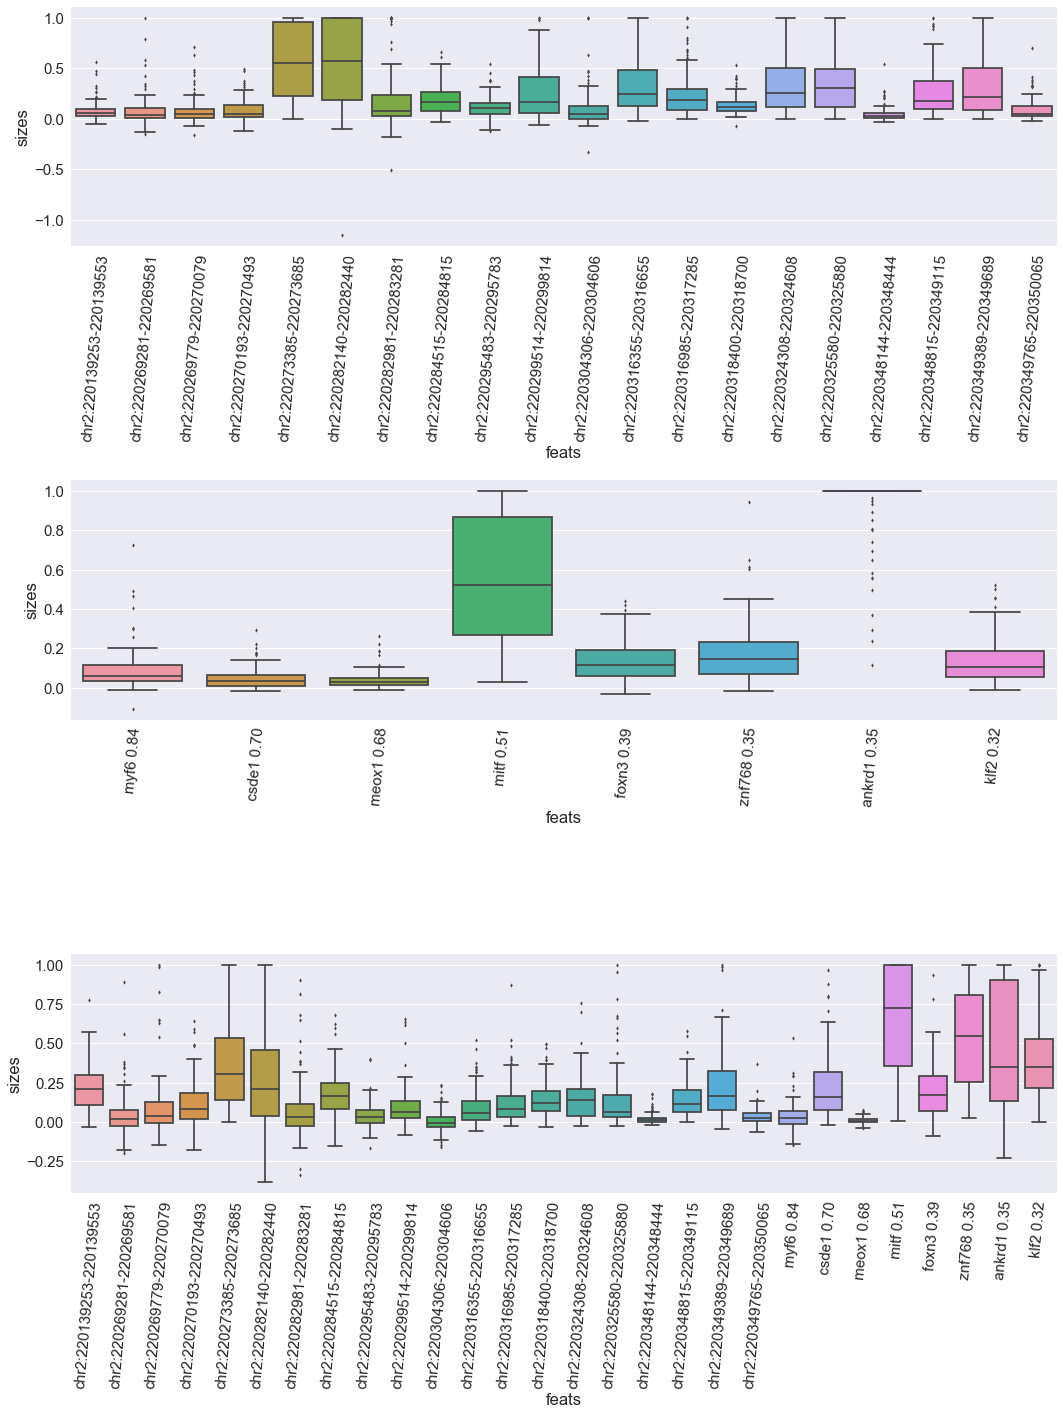

In [12]:
gene = "DES"
'''df_ns_pooled1 = get_df_ns_from_pooled_logs(gene, rank_lower_lim=1, rank_upper_lim=50, use_nonRanked=True, mode="dhss_tfs", lr=0.05)
df_ns_pooled2 = get_df_ns_from_pooled_logs(gene, rank_lower_lim=51, rank_upper_lim=100, use_nonRanked=True, mode="dhss_tfs", lr=0.05)
df_ns_pooled3 = get_df_ns_from_pooled_logs(gene, rank_lower_lim=101, rank_upper_lim=200, use_nonRanked=True, mode="dhss_tfs", lr=0.05)
'''
df_ns_pooled1 = get_df_ns_from_pooled_logs(gene, rank_lower_lim=101, rank_upper_lim=200, use_nonRanked=True, mode="dhss", lr=0.005)
df_ns_pooled2 = get_df_ns_from_pooled_logs(gene, rank_lower_lim=101, rank_upper_lim=200, use_nonRanked=True, mode="tfs", lr=0.005)
df_ns_pooled3 = get_df_ns_from_pooled_logs(gene, rank_lower_lim=101, rank_upper_lim=200, use_nonRanked=True, mode="dhss_tfs", lr=0.005)

sns.set(font_scale=1.5)
plt.figure(0,(15,20))
plt.subplot(3,1,1)
sns.boxplot(x="feats", y="sizes", data=df_ns_pooled1, fliersize=3)
plt.xticks(rotation=85)
plt.subplot(3,1,2)
sns.boxplot(x="feats", y="sizes", data=df_ns_pooled2, fliersize=3)
plt.xticks(rotation=85)
plt.subplot(3,1,3)
sns.boxplot(x="feats", y="sizes", data=df_ns_pooled3, fliersize=3)
plt.xticks(rotation=85)
plt.tight_layout()

plt.savefig("{}/for_figure_1/{}_node_sizes_across_modes_k101_to_200.pdf".format(inputDir_base, gene))

In [11]:
df_ns_pooled1.head()

,feats,sizes
0,chr2:220139253-220139553,0.006379
1,chr2:220269281-220269581,0.036814
2,chr2:220269779-220270079,-0.011664
3,chr2:220270193-220270493,0.055221
4,chr2:220273385-220273685,0.631493
